<a href="https://colab.research.google.com/github/romenlaw/ML-playground/blob/main/ml_playground6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import graphviz
import pandas as pd
import numpy as np
import random
import math
from matplotlib import pyplot as plt

plt.figure(figsize=(5,5))

def plot_points(features, labels, size_of_points=100, ax=None):
  # print("size of points: ", size_of_points)
  X = np.array(features)
  y = np.array(labels)
  spam_idxs = np.argwhere(y==1)
  ham_idxs = np.argwhere(y==0)
  spam = X[np.argwhere(y==1)].squeeze(axis=1)
  ham = X[np.argwhere(y==0)].squeeze(axis=1)
  spam_x, spam_y = spam[:,0], spam[:,1]
  ham_x, ham_y = ham[:,0], ham[:,1]

  if np.isscalar(size_of_points ):
    spam_weights = size_of_points
    ham_weights = size_of_points
  else:
    spam_weights = size_of_points[spam_idxs]
    ham_weights = size_of_points[ham_idxs]
  # print(spam_weights, ham_weights)
  if ax is None:
    plt.scatter(spam_x, spam_y,
                s = spam_weights,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter(ham_x, ham_y,
                s = ham_weights,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('Lottery')
    plt.ylabel('Sale')
    plt.legend(['Spam','Ham'])
  else:
    ax.scatter(spam_x, spam_y,
                s = spam_weights,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    ax.scatter(ham_x, ham_y,
                s = ham_weights,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    ax.set_xlabel('Lottery')
    ax.set_ylabel('Sale')
    ax.legend(['Spam','Ham'])


def plot_model(X, y, model, size_of_points=100, ax=None):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax is None:
      plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
      plt.contour(xx, yy, Z,colors = 'k',linewidths = 1, levels=0)
      plot_points(X, y, size_of_points)
      plt.show()
    else:
      ax.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
      ax.contour(xx, yy, Z,colors = 'k',linewidths = 1, levels=0)
      plot_points(X, y, size_of_points, ax=ax)


<Figure size 500x500 with 0 Axes>

# Ensemble

Techniques of combining weak learners into strong learner:
* **Bagging**:
  * build sub datasets by randomly draw from dataset (with replacement)
  * train (weak) models with these sub-datasets.
  * combine week models to build storng one. prediction is done by voting (if classification) or averaging (if regression)
* **Boosting**:
  * start by training a random model, the first weak learner. Evaluate it on entire dataset
  * shrink points with good pred; enlarge points with bad pred. Train 2nd weak learner on this modified dataset.
  * continue to build several weak models
  * combine the week models in same way as Bagging - i.e. voting or averaging.


# Random Forest
## Spam email example Dataset
Dataset contains number of appearances of the words 'Lottery' and 'Sale' in each email and whether the email is spam or not.

In [2]:
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1
5,9,6,1
6,8,5,0
7,7,1,0
8,1,9,1
9,4,7,0


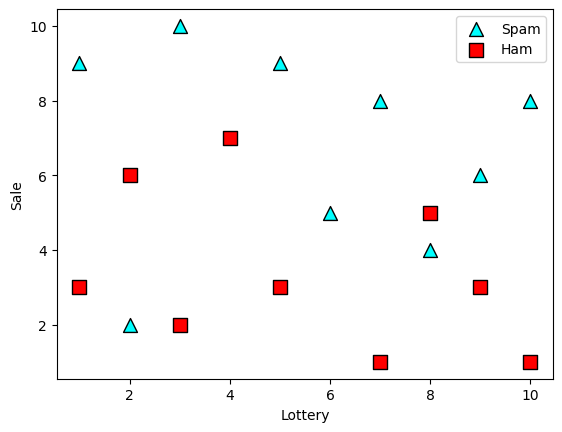

In [50]:
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
plot_points(features, labels)

## Decision Tree Classifier

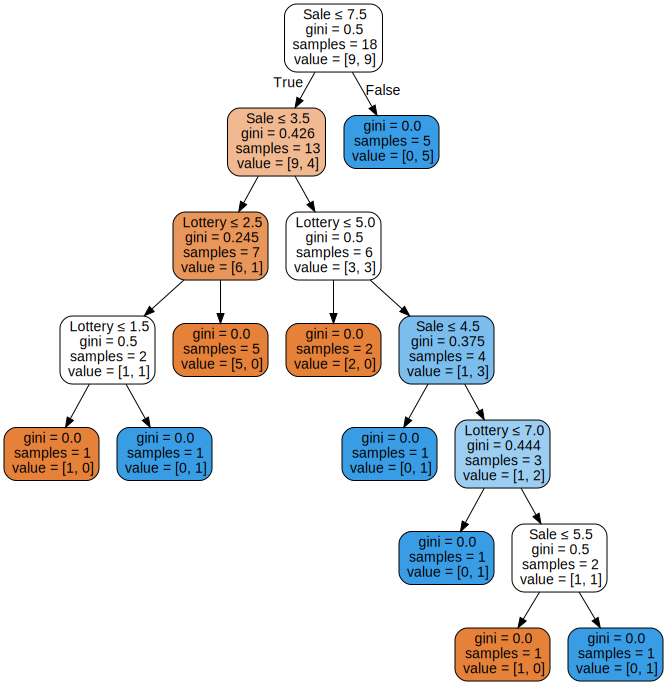

In [51]:
# fit a decision tree and visualise it

from sklearn.tree import DecisionTreeClassifier, export_graphviz

decision_tree = DecisionTreeClassifier()
decision_tree.fit(features, labels)

dot_data = export_graphviz(decision_tree, feature_names=['Lottery', 'Sale'],
                           filled=True, rounded=True, special_characters=True)
g = graphviz.Source(dot_data)
g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


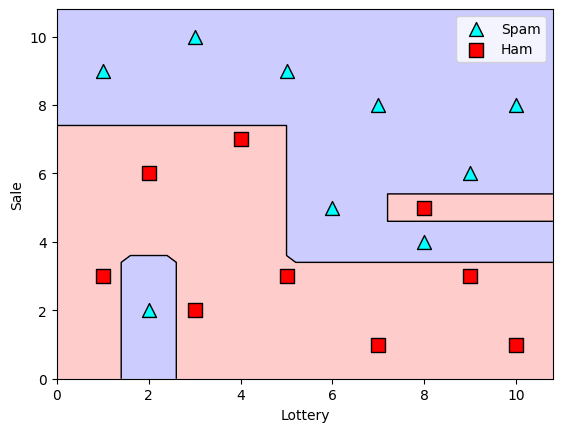

In [52]:
plot_model(features, labels, decision_tree)

## Manual Impl

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


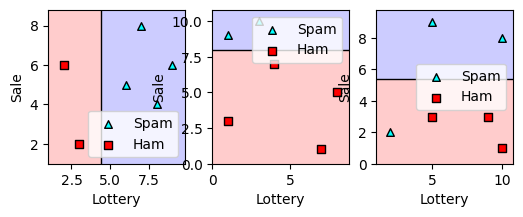

In [53]:
# divide the datasets (18 data points) into 3 subsets
weak_learners = []
dataset_size = len(spam_dataset)
num_subsets = 3
subset_size = dataset_size // num_subsets
fig, axes = plt.subplots(1, num_subsets, figsize=(num_subsets*2,2))
for i in range(num_subsets):
  start_idx = i*subset_size
  end_idx = start_idx + subset_size -1 # df index range is all inclusive, so -1
  sub_features = features.loc[start_idx:end_idx]
  sub_labels = labels.loc[start_idx:end_idx]
  # plot_points(sub_features, sub_labels, ax=axes[i])

  weak_learner = DecisionTreeClassifier(max_depth=1)
  weak_learner.fit(sub_features, sub_labels)
  weak_learners.append(weak_learner)
  plot_model(sub_features, sub_labels, weak_learner, size_of_points=30, ax=axes[i])

In [54]:
from IPython.display import display, HTML

html_content = '<div style="display: flex; justify-content: space-around; ">'
for wl in weak_learners:
  dot_data = export_graphviz(wl, feature_names=['Lottery', 'Sale'],
                             filled=True, rounded=True, special_characters=True)
  g = graphviz.Source(dot_data)
  svg = g.pipe(format='svg').decode('utf-8')
  html_content += f'<div>{svg}</div>'
html_content += '</div>'
display(HTML(html_content))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


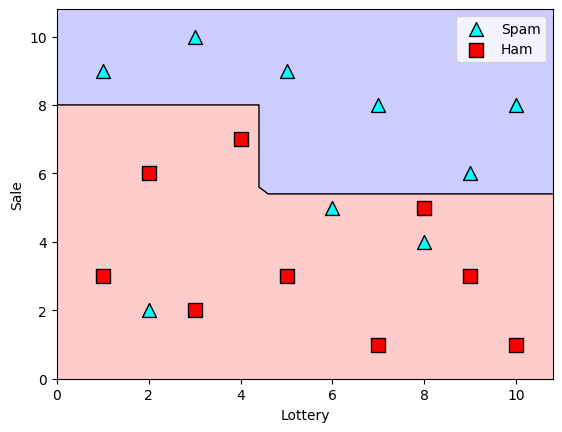

In [55]:
# combine the weak_learners into strong one
class StrongLearner():
  def __init__(self, weak_learners):
    self.weak_learners = weak_learners

  def predict(self, feature):
    preds = np.zeros((len(feature)))
    for wl in self.weak_learners:
      # pred is 1-D array, same len as feature
      pred = wl.predict(feature)
      # print(pred)
      preds = preds + pred

    # we have 3 weak learners, if 2 out of 3 got 0 then return 0
    # if 2 out of 3 got 1 then return 1
    threshold = len(self.weak_learners)/2
    return np.where(preds>threshold, 1, 0)

strong_learner = StrongLearner(weak_learners=weak_learners)
plot_model(features, labels, strong_learner)

## SKLearn Impl

0.8333333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


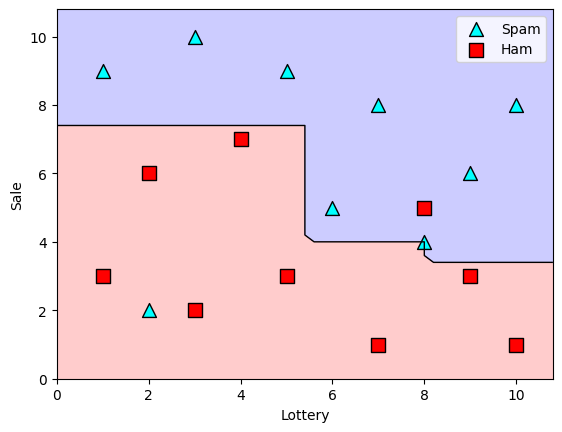

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=5, max_depth=1, random_state=0)
rfc_model.fit(features, labels)
print(rfc_model.score(features, labels))
plot_model(features, labels, rfc_model)

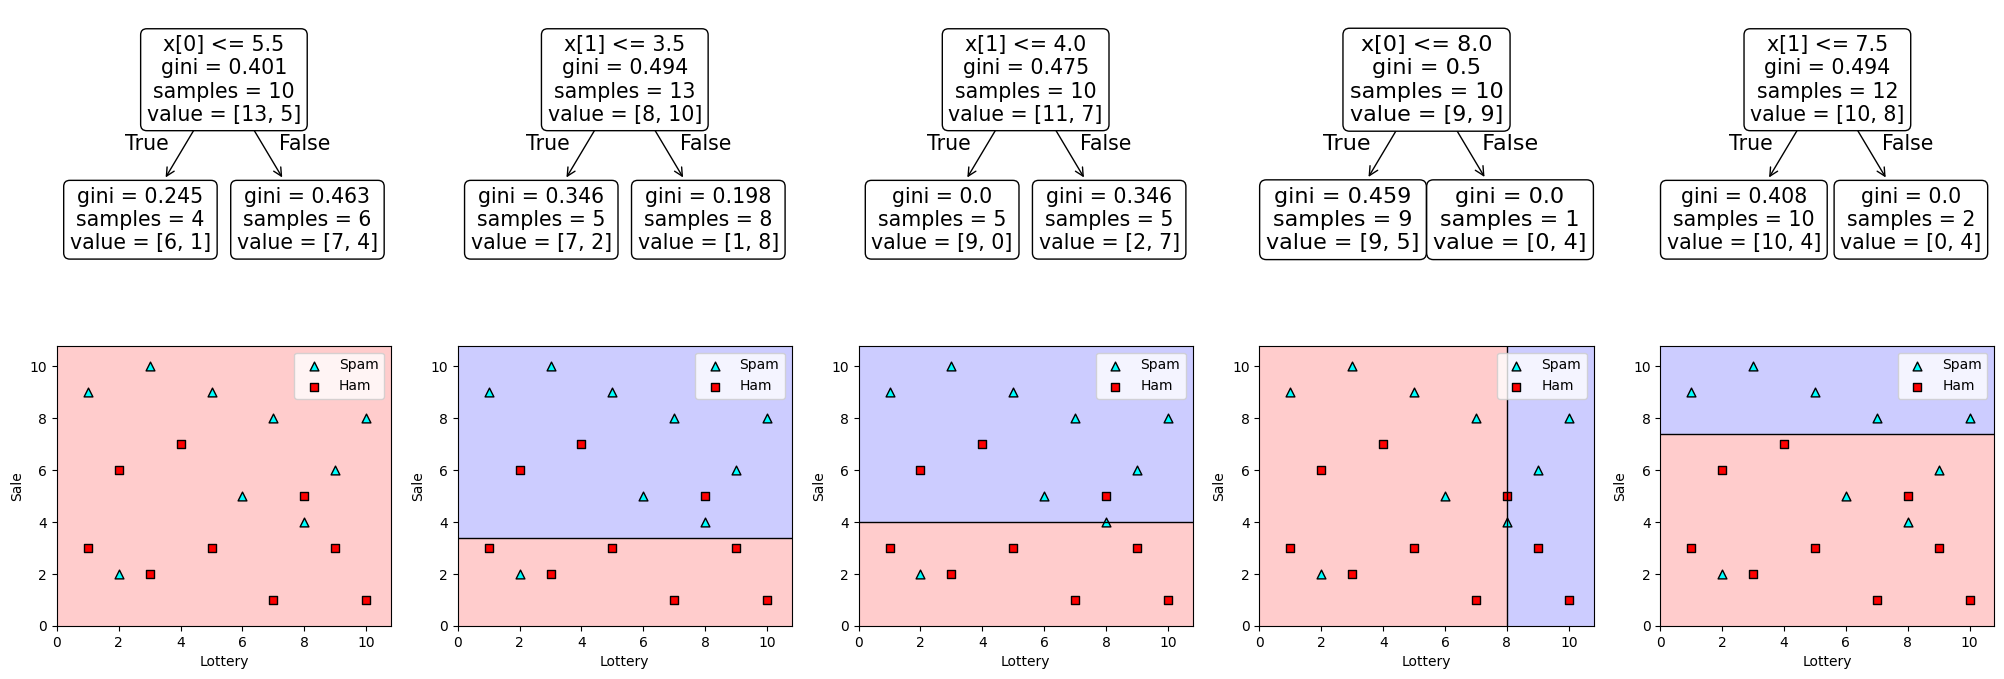

In [57]:
from IPython.display import display, HTML
from sklearn import tree

fig, axes = plt.subplots(2,5, figsize=(25,8))
for i, wl in enumerate(rfc_model.estimators_):
  tree.plot_tree(wl, ax=axes[0,i], rounded=True)
  plot_model(features, labels, wl, size_of_points=40, ax=axes[1,i])
plt.show()

# AdaBoost
Adaptive boosting:
* each weak learner is decision tree of depth 1
* unlike Random Forest, each weak learner is trained on whole dataset.
* after each weak learner training, we enlarge the incorrectly classified points (by giving a weight to each point).
* train new weak learner with the modified dataset.

The score of weak learner to satisfy the following:
1. is positive if accuracy of learner > 0.5
2. is 0 if accuracy of learner == 0.5
3. is nagative if accuracy of learner < 0.5
4. is large positive number if accuracy close to 1
5. is large negative number if accuracy close to 0

The log-odds or logits satisfies the above:
$logit(x) = \ln\frac{x}{1-x}$, where x is a probability (i.e. between 0 and 1)

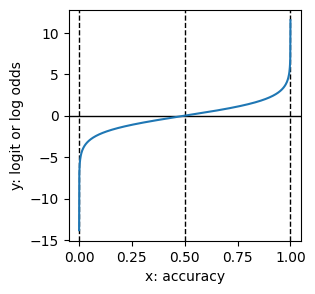

In [58]:
# plot logit function y=ln(x/(1-x)) where x is (-1,1)
xs = np.linspace(.000001, .99999, 1000)
plt.figure(figsize=(3,3))
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0.5, color='k', linewidth=1, linestyle='--')
plt.axvline(x=0, color='k', linewidth=1, linestyle='--')
plt.axvline(x=1, color='k', linewidth=1, linestyle='--')
plt.plot(xs, np.log(xs/(1-xs)))
plt.xlabel('x: accuracy')
plt.ylabel('y: logit or log odds')

plt.show()


## Data points with weights

In chp9 we learned Gini impurity, entropy, etc.

**Gini Impurity Index** or *Gini index* measures how diverse is the dataset - the bigger the value, the more diverse; a pure set always has Gini index 0. In a set with $m$ elements and $n$ classes, with $a_i$ elements belonging to the $i$-th class, the Gini impurity index is
$$Gini = 1-p_1^2-p_2^2\ldots -p_n^2 \text { , where } p_i=\frac{a_i}{m}
$$

With weights, the $a_i$ and $m$ are no longer simple counts of elements of each class, but the total weights of each element (data point).

In [59]:
# return list of count of each class
def counts(elements, weights):
  element_counts = {}
  for i, element in enumerate(elements):
    if element in element_counts:
      element_counts[element] += weights[i]
    else:
      element_counts[element] = weights[i]

  return list(element_counts.values())

def gini(elements, weights=None):
  if weights is None:
    weights = np.ones(len(elements)) # default weights to all ones.
  cnts = counts(elements, weights)
  total = sum(cnts)
  gini = 1 - sum( [(c/total)**2 for c in cnts])
  return gini

In [60]:
elements = ['A', 'A', 'A', 'C', 'B', 'C']
element_weights = [1, 2, 4, 3, 2, 1]
gini(elements), gini(elements, element_weights)

(np.float64(0.6111111111111112), 0.591715976331361)

similarly for entropy:

**Entropy**: in a set of $m$ elements and $n$ classe, with $a_i$ elements belonging to the $i$-th class, the entropy is
$$Entropy=-p_1\log_2(p_1)-p_2\log_2(p_2)\ldots -p_i\log_2(p_i) \text{ , where } p_i=\frac{a_i}{m}
$$

With weights, the $a_i$ and $m$ are no longer simple counts of elements of each class, but the total weights of each element (data point).

In [61]:
# similarly for entropy calc
# generalise it
def entropy(elements, weights=None):
  if weights is None:
    weights = np.ones(len(elements))
  cnts = np.array(counts(elements, weights))
  total = sum(cnts)
  calc_prob = lambda x: - x/total * np.log2(x/total)
  entropy = calc_prob(np.array(cnts)).sum()
  # entropy = sum([-p * math.log2(p) for p in p_elements])

  return entropy

In [62]:
set1=['red']*8+['blue']*2
set2 = ['red']*4 + ['blue']*3 + ['yellow']*2 + ['green']
set_weights = [1,2,3,4,5,5,4,3,2,1]
entropy(set1), entropy(set2), entropy(set1, set_weights), entropy(set2, set_weights)

(np.float64(0.7219280948873623),
 np.float64(1.8464393446710154),
 np.float64(0.4689955935892812),
 np.float64(1.6358275845379553))

## Manual Impl

In [3]:
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset


,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1
5,9,6,1
6,8,5,0
7,7,1,0
8,1,9,1
9,4,7,0


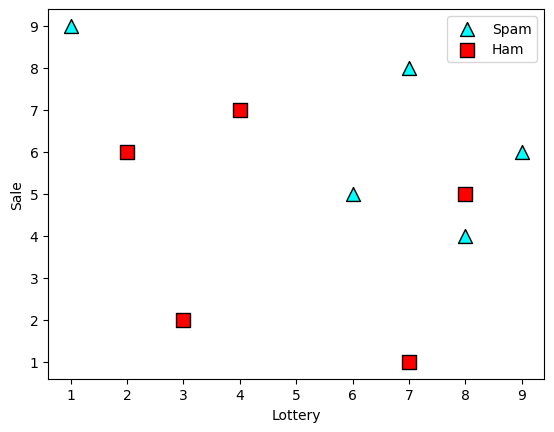

In [4]:
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
plot_points(features, labels)

In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
class AdaBoostWeakLearner():
  def __init__(self, weights):
    self.weights = weights
    self._model = DecisionTreeClassifier(max_depth=1)

  def fit(self, features, labels):
    self._model.fit(features, labels, sample_weight=self.weights)
    preds = self._model.predict(features)
    self.num_corrects = self.weights[np.argwhere(preds==labels)].sum()
    self.num_incorrects = self.weights[np.argwhere(preds!=labels)].sum()
    self.rescaling_factor = self.num_corrects / self.num_incorrects
    self.accuracy = self.num_corrects / self.weights.sum()
    # self.logit = math.log(self.accuracy/(1-self.accuracy))
    self.logit = math.log(self.rescaling_factor)

    self.new_weights = self.weights.copy()
    self.new_weights[preds != labels] *= self.rescaling_factor

  def predict(self, features):
    return self._model.predict(features)

  def print_stats(self):
    print(f"initial weights: ", self.weights)
    print(f"correct={self.num_corrects}, incorrect={self.num_incorrects}, rescaling_factor={self.rescaling_factor}")
    print(f"accuracy={self.accuracy}, logit={self.logit}")
    print("new weights =", self.new_weights)


initial weights:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
correct=7.0, incorrect=3.0, rescaling_factor=2.3333333333333335
accuracy=0.7, logit=0.8472978603872037
new weights = [1.         1.         1.         2.33333333 1.         1.
 2.33333333 1.         1.         2.33333333]
score=0.7


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


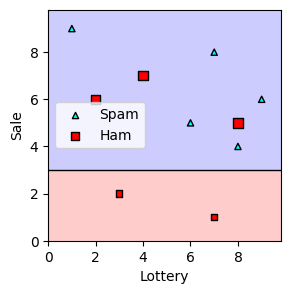

In [6]:
# step 1 assign each point a weight of 1
weights = np.ones(len(features))

# build weak learner 1
weak_learner1 = AdaBoostWeakLearner(weights)
weak_learner1.fit(features, labels)
weak_learner1.print_stats()
print(f"score={weak_learner1._model.score(features, labels)}")

plt.figure(figsize=(3,3))
plot_model(features, labels, weak_learner1, size_of_points=20*weak_learner1.new_weights)
plt.show()


initial weights:  [1.         1.         1.         2.33333333 1.         1.
 2.33333333 1.         1.         2.33333333]
correct=11.000000000000002, incorrect=3.0, rescaling_factor=3.6666666666666674
accuracy=0.7857142857142857, logit=1.299282984130261
new weights = [1.         1.         3.66666667 2.33333333 3.66666667 3.66666667
 2.33333333 1.         1.         2.33333333]
score=0.7857142857142857


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


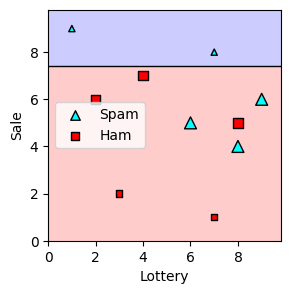

In [7]:
# build weak learner 2
weak_learner2 = AdaBoostWeakLearner(weak_learner1.new_weights)
weak_learner2.fit(features, labels)
weak_learner2.print_stats()
print(f"score={weak_learner2._model.score(features, labels, sample_weight=weak_learner2.weights)}")

plt.figure(figsize=(3,3))
plot_model(features, labels, weak_learner2, size_of_points=20*weak_learner2.new_weights)
plt.show()

initial weights:  [1.         1.         3.66666667 2.33333333 3.66666667 3.66666667
 2.33333333 1.         1.         2.33333333]
correct=17.66666666666667, incorrect=4.333333333333334, rescaling_factor=4.0769230769230775
accuracy=0.8030303030303032, logit=1.4053425560905852
new weights = [1.         1.         3.66666667 2.33333333 3.66666667 3.66666667
 9.51282051 4.07692308 4.07692308 2.33333333]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


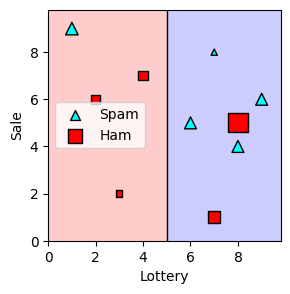

In [8]:
# build weak learner 3
weak_learner3 = AdaBoostWeakLearner(weak_learner2.new_weights)
weak_learner3.fit(features, labels)
weak_learner3.print_stats()

plt.figure(figsize=(3,3))
plot_model(features, labels, weak_learner3, size_of_points=20*weak_learner3.new_weights)
plt.show()

initial weights:  [1.         1.         3.66666667 2.33333333 3.66666667 3.66666667
 9.51282051 4.07692308 4.07692308 2.33333333]
correct=24.333333333333336, incorrect=11.000000000000002, rescaling_factor=2.212121212121212
accuracy=0.6886792452830187, logit=0.7939518796819108
new weights = [1.         1.         8.11111111 2.33333333 8.11111111 8.11111111
 9.51282051 4.07692308 4.07692308 2.33333333]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


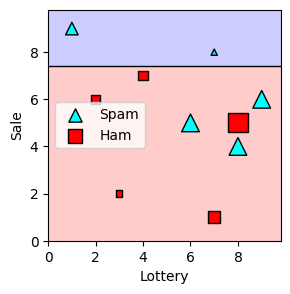

In [9]:
# build weak learner 4
weak_learner4 = AdaBoostWeakLearner(weak_learner3.new_weights)
weak_learner4.fit(features, labels)
weak_learner4.print_stats()

plt.figure(figsize=(3,3))
plot_model(features, labels, weak_learner4, size_of_points=20*weak_learner4.new_weights)
plt.show()

initial weights:  [1.         1.         8.11111111 2.33333333 8.11111111 8.11111111
 9.51282051 4.07692308 4.07692308 2.33333333]
correct=34.48717948717949, incorrect=14.179487179487182, rescaling_factor=2.432188065099457
accuracy=0.708640674394099, logit=0.8887912905136045
new weights = [ 1.          1.          8.11111111  5.67510549  8.11111111  8.11111111
 23.13696852  4.07692308  4.07692308  5.67510549]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


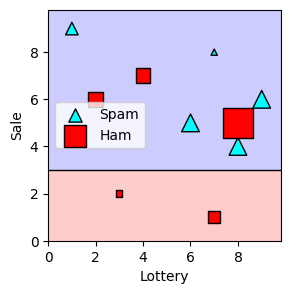

In [10]:
# build weak learner 5
weak_learner5 = AdaBoostWeakLearner(weak_learner4.new_weights)
weak_learner5.fit(features, labels)
weak_learner5.print_stats()

plt.figure(figsize=(3,3))
plot_model(features, labels, weak_learner5, size_of_points=20*weak_learner5.new_weights)
plt.show()

initial weights:  [ 1.          1.          8.11111111  5.67510549  8.11111111  8.11111111
 23.13696852  4.07692308  4.07692308  5.67510549]
correct=47.675213675213676, incorrect=21.2991452991453, rescaling_factor=2.238362760834671
accuracy=0.6912019826517968, logit=0.8057446882800904
new weights = [ 2.23836276  1.         18.15560906  5.67510549 18.15560906  8.11111111
 23.13696852  4.07692308  9.12563279  5.67510549]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


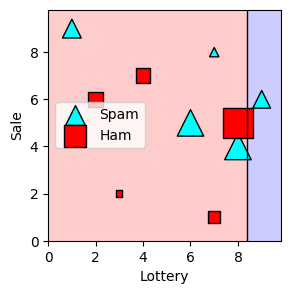

In [11]:
# build weak learner 6
weak_learner6 = AdaBoostWeakLearner(weak_learner5.new_weights)
weak_learner6.fit(features, labels)
weak_learner6.print_stats()

plt.figure(figsize=(3,3))
plot_model(features, labels, weak_learner6, size_of_points=20*weak_learner6.new_weights)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


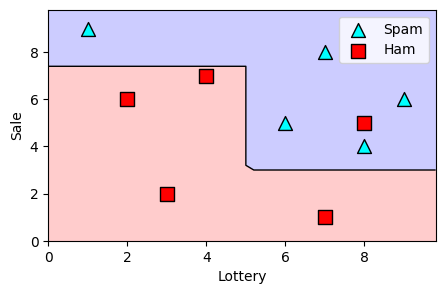

In [58]:
# after 3 weak learners, we stop and combine them into strong learner
# combine the weak_learners into strong one
class AdaBoostStrongLearner():
  def __init__(self, weak_learners):
    self.weak_learners = weak_learners

  def predict(self, feature):
    preds = np.zeros((len(feature)))
    for wl in self.weak_learners:
      # pred is 1-D array, same len as feature
      pred = wl.predict(feature)
      # change the values from 0,1 into -1, 1
      pred[pred==0] = -1

      # preds is the weighted sum of all the weak_learners' predictions
      preds = preds + pred * wl.logit
    preds = np.where(preds <= 0, 0, 1)

    return preds

weak_learners = [weak_learner1, weak_learner2, weak_learner3,
                #  weak_learner6, #weak_learner5, #weak_learner6,
                 ]
strong_learner = AdaBoostStrongLearner(weak_learners=weak_learners)
plt.figure(figsize=(5,3))
plot_model(features, labels, strong_learner)
plt.show()
# strong_learner.predict(features), labels


## SKLearn impl

In [42]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(n_estimators=3)
adaboost_classifier.fit(features, labels)
adaboost_classifier.score(features, labels)

0.9

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


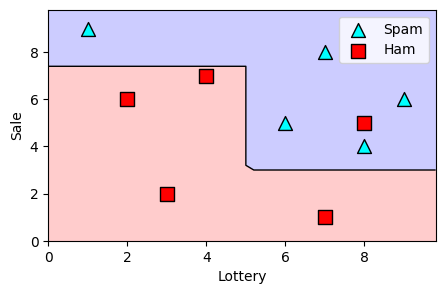

In [59]:
plt.figure(figsize=(5,3))
plot_model(features, labels, adaboost_classifier)
plt.show()